## Copied File for model optimization attempt

## 1.Extract US stock market dataset
#### Include adjusted close prices as daily price indicator, combined with daily trading volume which shows the intensity of trading 
#### Choose ten stocks in each sector initially for cointegration test to find proper pairs


In [55]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
# Choose tech,healthcare and real estate as primary sectors
# For each sector, choose 30 stocks to find cointegrated pairs respectively
sectors = {
    "Technology": ["AAPL", "MSFT", "GOOGL", "NVDA", "META", "TSM", "ORCL", "ADBE", "CSCO", "INTC",
                   "IBM", "SAP", "CRM", "AMD", "TXN", "QCOM", "AVGO", "NOW", "INTU", "SHOP", 
                   "WDAY", "CDNS", "PANW", "SNOW", "SQ", "ZM", "ASML", "MU", "XLNX", "DOCU"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "LLY", "TMO", "UNH", "ABT", "BMY", "CVS",
                   "DHR", "AMGN", "GILD", "BIIB", "ZTS", "BDX", "ISRG", "SYK", "BSX", "CI",
                   "HCA", "REGN", "VRTX", "MDT", "MCK", "ILMN", "RHHBY", "ABC", "COO", "TFX"],
    "Real Estate": ["AMT", "PLD", "CCI", "DLR", "EQIX", "O", "SPG", "WELL", "AVB", "EQR",
                    "EXR", "IRM", "ESS", "BXP", "ARE", "PSA", "VTR", "MAA", "HST", "UDR",
                    "SUI", "CPT", "STOR", "KIM", "SLG", "PEAK", "REG", "SRC", "AIV", "BRX"]
}

# Define date range for the last 5 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

sector_data = {}

for sector, tickers in sectors.items():
    # Download close price data for each stock in the sector
    data = yf.download(tickers, start=start_date, end=end_date)[['Adj Close','Volume']]
    # Save to dictionary with sector name
    sector_data[sector] = data
    data = data.dropna(axis=1, how='all')
# Display first few rows of each sector's data for verification
for sector, data in sector_data.items():
    print(f"Sector: {sector}")
    print(data.head(), "\n")


[*********************100%%**********************]  30 of 30 completed

1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  30 of 30 completed

1 Failed download:
['ABC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  30 of 30 completed

3 Failed downloads:
['SRC', 'PEAK', 'STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Sector: Technology
Price       Adj Close                                                   \
Ticker           AAPL       ADBE   AMD       ASML      AVGO       CDNS   
Date                                                                     
2014-11-28  26.485031  73.680000  2.79  95.712509  7.112164  18.870001   
2014-12-01  25.625441  73.750000  2.67  95.449852  6.925604  18.430000   
2014-12-02  25.527447  73.470001  2.68  95.784973  7.020786  18.490000   
2014-12-03  25.816950  73.180000  2.74  97.605377  7.243902  18.490000   
2014-12-04  25.718973  73.029999  2.69  97.224998  7.848510  18.570000   

Price                                             ...    Volume                \
Ticker            CRM       CSCO DOCU      GOOGL  ...      QCOM      SAP SHOP   
Date                                              ...                           
2014-11-28  59.605389  20.209724  NaN  27.386187  ...   5817900   432700  NaN   
2014-12-01  58.818886  20.173168  NaN  26.915854  ...   9474300 

## Check if the dates for every stock match

In [56]:
# Check consistency of data length and dates across all stocks in each sector
for sector, data in sector_data.items():
    print(f"Checking sector: {sector}")

    # Separate 'Adj Close' and 'Volume' data and create copies to avoid modification warnings
    adj_close_data = data['Adj Close'].copy()
    volume_data = data['Volume'].copy()
    
    # Extract the list of dates for each Ticker's adjusted close prices
    date_lengths = {Ticker: adj_close_data[Ticker].dropna().shape[0] for Ticker in adj_close_data.columns}
    unique_lengths = set(date_lengths.values())
    
    # Check if all stocks have the same number of data points
    if len(unique_lengths) != 1:
        print("Inconsistent data lengths found.")
        print("Data lengths by Ticker:", date_lengths)
    
    # Verify that dates match across all stocks
    all_dates = adj_close_data.index
    stocks_to_drop = []
    for Ticker in adj_close_data.columns:
        stock_dates = adj_close_data[Ticker].dropna().index
        if not stock_dates.equals(all_dates):
            print(f"Dates do not perfectly match for Ticker and is thus dropped: {Ticker}")
            stocks_to_drop.append(Ticker)
    
    # Drop stocks with inconsistent data from both 'Adj Close' and 'Volume'
    if stocks_to_drop:
        adj_close_data.drop(columns=stocks_to_drop, inplace=True)
        volume_data.drop(columns=stocks_to_drop, inplace=True)
        print(f"Stocks dropped: {stocks_to_drop}")

    # Reassemble the cleaned data
    cleaned_data = pd.concat([adj_close_data, volume_data], axis=1, keys=['Adj Close', 'Volume'])
    
    # Save the modified data back to the sector_data dictionary
    sector_data[sector] = cleaned_data
    print("\n")

Checking sector: Technology
Inconsistent data lengths found.
Data lengths by Ticker: {'AAPL': 2516, 'ADBE': 2516, 'AMD': 2516, 'ASML': 2516, 'AVGO': 2516, 'CDNS': 2516, 'CRM': 2516, 'CSCO': 2516, 'DOCU': 1658, 'GOOGL': 2516, 'IBM': 2516, 'INTC': 2516, 'INTU': 2516, 'META': 2516, 'MSFT': 2516, 'MU': 2516, 'NOW': 2516, 'NVDA': 2516, 'ORCL': 2516, 'PANW': 2516, 'QCOM': 2516, 'SAP': 2516, 'SHOP': 2398, 'SNOW': 1057, 'SQ': 2270, 'TSM': 2516, 'TXN': 2516, 'WDAY': 2516, 'XLNX': 0, 'ZM': 1413}
Dates do not perfectly match for Ticker and is thus dropped: DOCU
Dates do not perfectly match for Ticker and is thus dropped: SHOP
Dates do not perfectly match for Ticker and is thus dropped: SNOW
Dates do not perfectly match for Ticker and is thus dropped: SQ
Dates do not perfectly match for Ticker and is thus dropped: XLNX
Dates do not perfectly match for Ticker and is thus dropped: ZM
Stocks dropped: ['DOCU', 'SHOP', 'SNOW', 'SQ', 'XLNX', 'ZM']


Checking sector: Healthcare
Inconsistent data lengths 

In [57]:
# Check if the data length(dates) for each sector after cleaning is consistent, respectively
for sector, data in sector_data.items():
    date_lengths = {Ticker: data['Adj Close'][Ticker].dropna().shape[0] for Ticker in data['Adj Close'].columns}
    unique_lengths = set(date_lengths.values())
    if len(unique_lengths) != 1:
        print(f"Data lengths are inconsistent for sector: {sector}")
        print("Data lengths by Ticker:", date_lengths)
    else:
        print(f"Data lengths are consistent for sector: {sector}")

Data lengths are consistent for sector: Technology
Data lengths are consistent for sector: Healthcare
Data lengths are consistent for sector: Real Estate


## 2.Preprocess the dataset, including drop null values and standardization
#### The absolute value of changes in stock prices may not reflect the true relative moving between stocks. For instance, the relative motion of a 1 dollar stock and 10 dollar stock can hardly be explicated by absolute prices, but rather by standardized prices.

In [58]:
from sklearn.preprocessing import StandardScaler

# Process each sector's data
for sector, data in sector_data.items():
    
    # Step 1: Drop any rows with null values (ensure data consistency across stocks)
    data = data.dropna()
    
    # Step 2: Save original 'Adj Close' prices
    raw_close_prices = data['Adj Close'].copy()
    
    # Step 3: Standardize 'Adj Close' prices
    scaler = StandardScaler()
    standardized_close = pd.DataFrame(
        scaler.fit_transform(raw_close_prices), 
        index=raw_close_prices.index, 
        columns=raw_close_prices.columns
    )
    
    # Combine original and standardized close prices with volume data
    sector_data[sector] = pd.concat(
        {'Adj Close': raw_close_prices, 'Standardized Close': standardized_close, 'Volume': data['Volume']},
        axis=1
    )

print("Data processing complete.")



Data processing complete.


## 3. Cointegration Test

#### Rationale: Cointegration refers to a statistical relationship where two or more time series move together over the long term, ideal for pairs trading because their prices tend to revert to a stable spread.
#### Two major methods to choose from:
#### (1) Engle-Granger Method:  This efficient test is used to initially screen pairs by checking for cointegration between two time series. It involves a regression between the two series and tests the residuals for stationarity, providing a quick way to filter out potential pairs from a larger dataset
#### (2) Johansen's Method: Johansen accounts for endogeneity, where both stocks might influence each other, making it more reliable. This validation step ensures only pairs with a stable, long-term relationship are selected for trading
#### With such advantages combined, we can firstly implement Engle-Granger Method and then validate the results using Johansen's Method



Potential Pair Found: ABBV, CI
Engle-Granger Test: p-value: 0.0009, t-statistic: -4.5833
Johansen Test Confirmed: Trace Statistic: 33.9312
Hedge Ratio: 0.6195


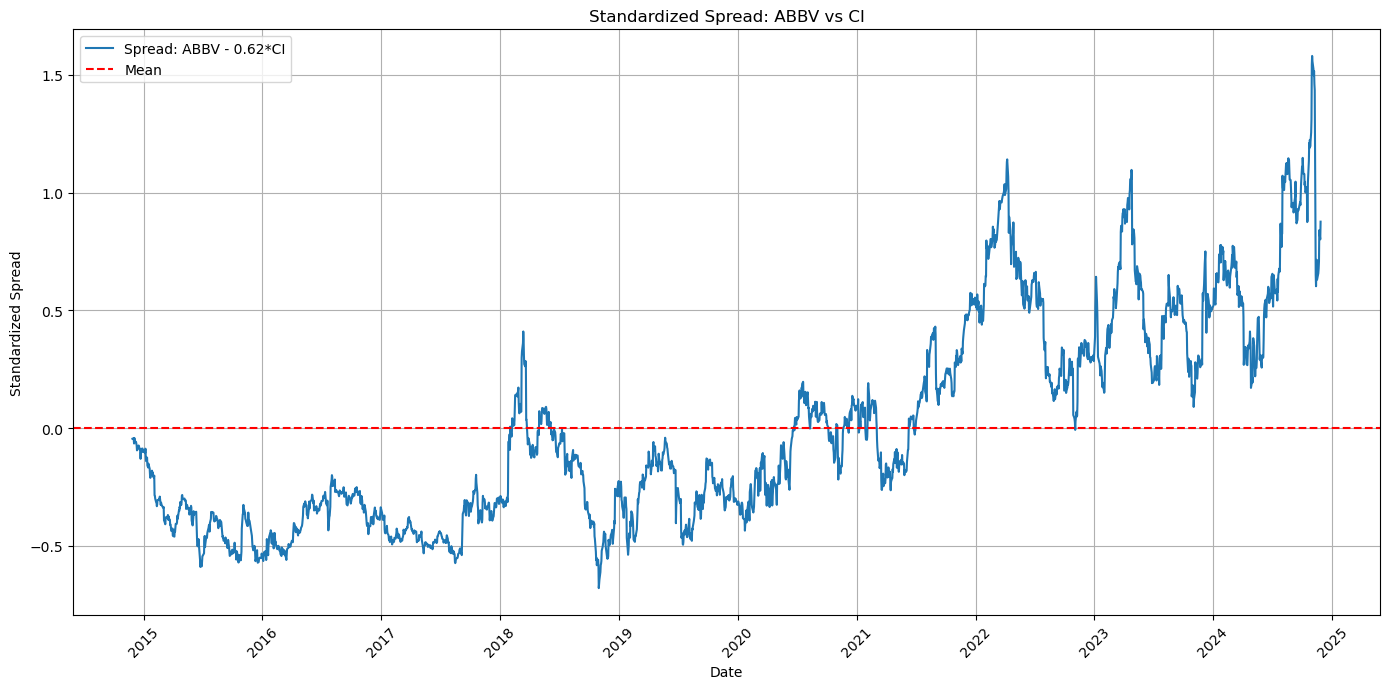


Potential Pair Found: ABT, ZTS
Engle-Granger Test: p-value: 0.0002, t-statistic: -5.0120
Johansen Test Confirmed: Trace Statistic: 29.9115
Hedge Ratio: 0.5729


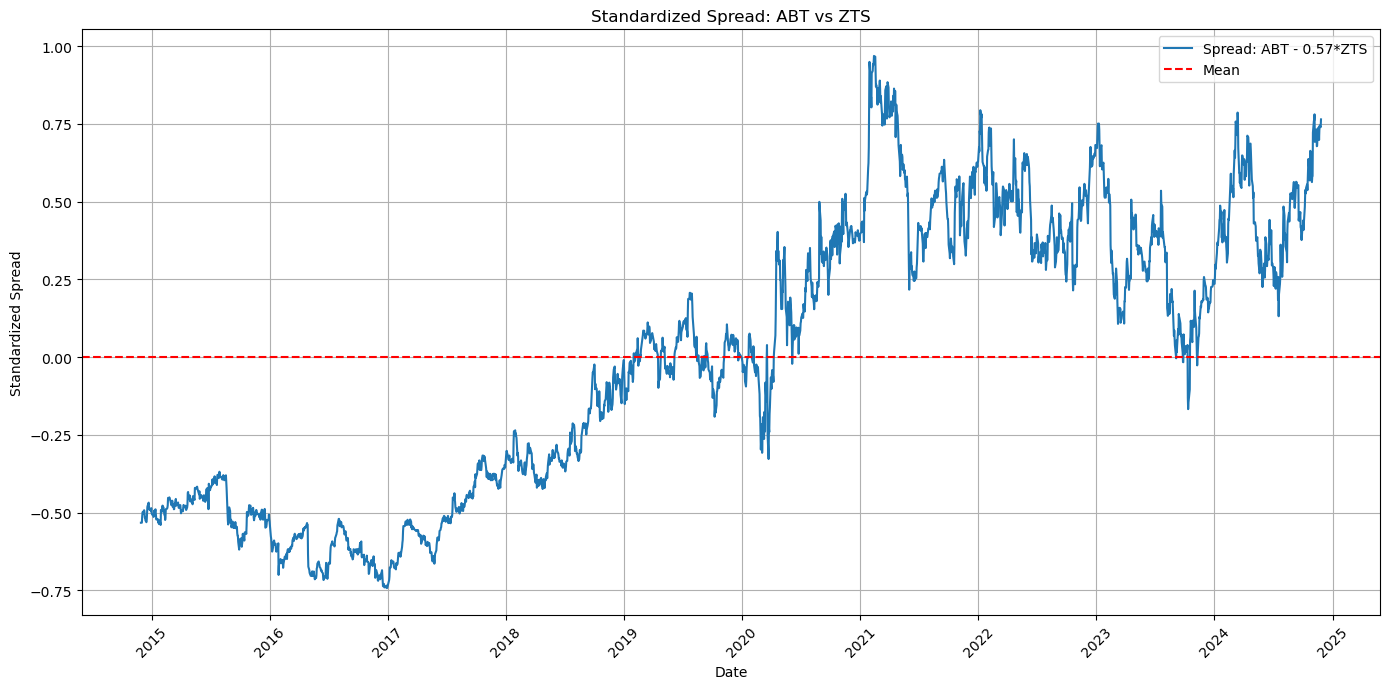


Potential Pair Found: AMGN, CI
Engle-Granger Test: p-value: 0.0045, t-statistic: -4.1377
Johansen Test Confirmed: Trace Statistic: 30.6766
Hedge Ratio: 0.4310


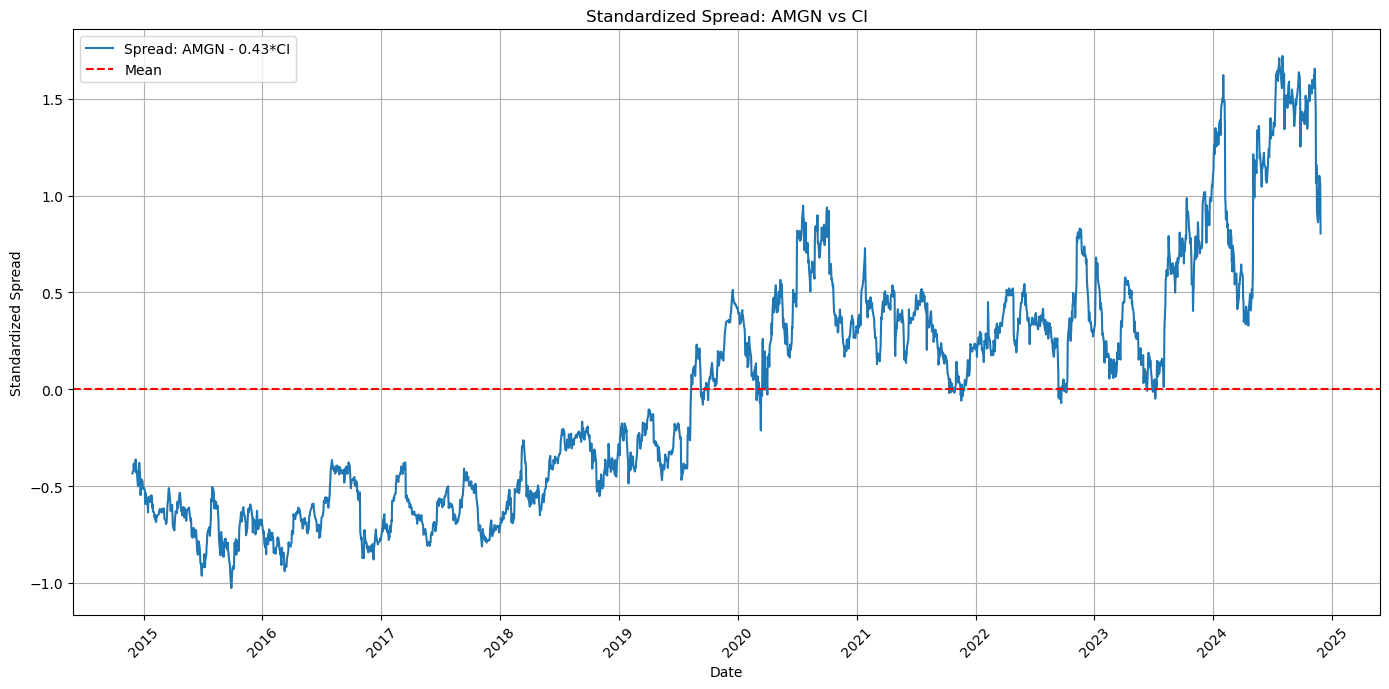


Potential Pair Found: AMGN, SYK
Engle-Granger Test: p-value: 0.0128, t-statistic: -3.8198
Johansen Test Confirmed: Trace Statistic: 35.5928
Hedge Ratio: -0.2001


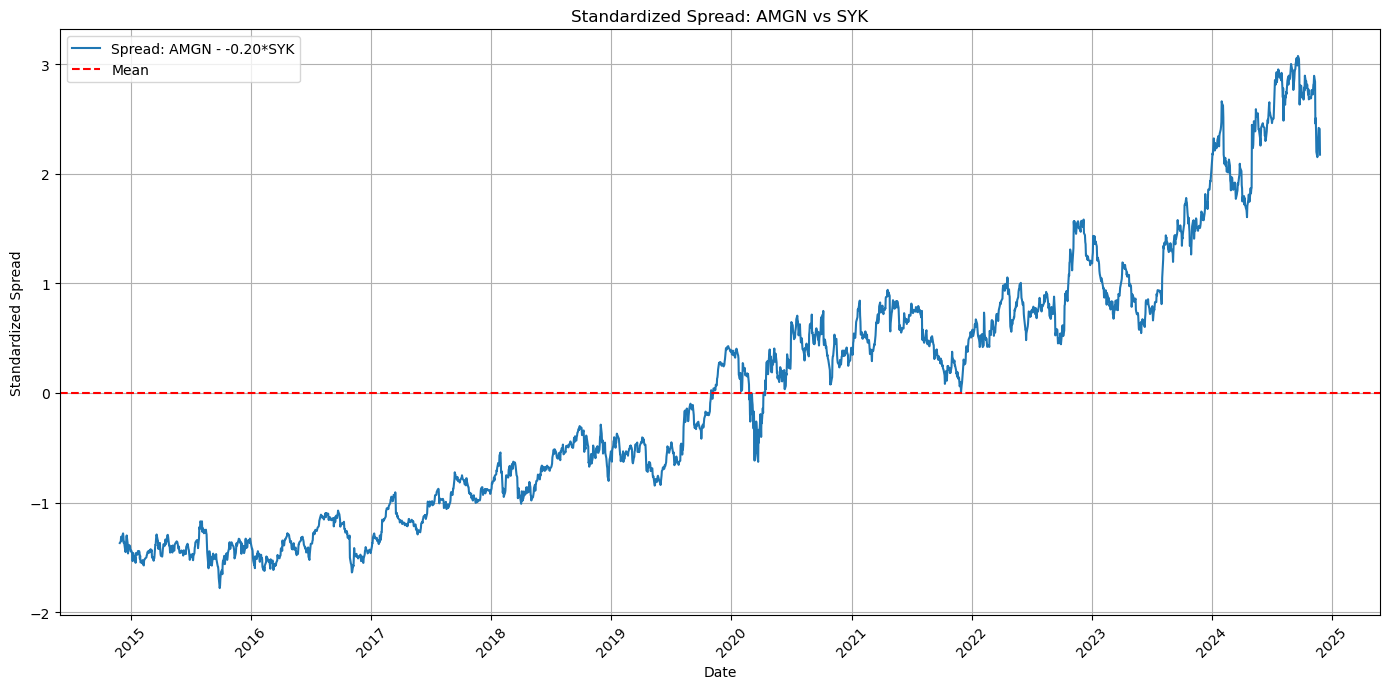


Potential Pair Found: BIIB, BSX
Engle-Granger Test: p-value: 0.0138, t-statistic: -3.7953
Johansen Test Confirmed: Trace Statistic: 21.9031
Hedge Ratio: -2.3435


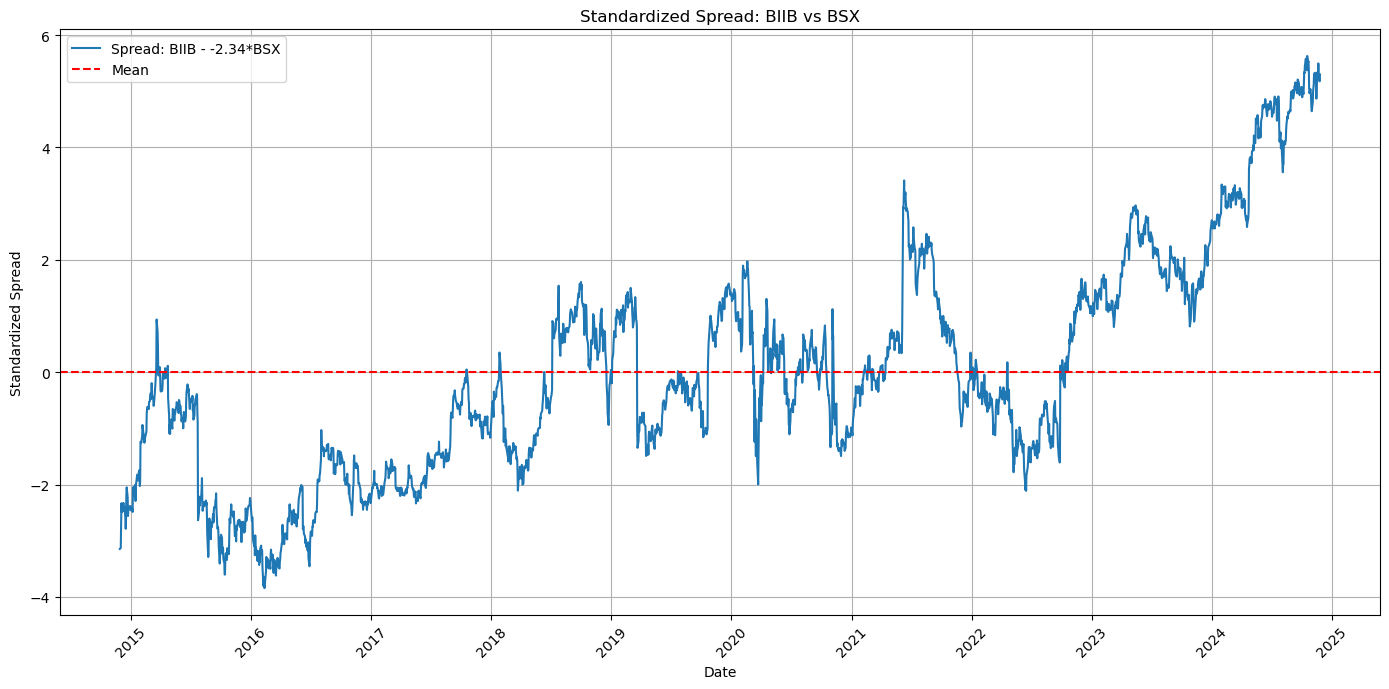


Potential Pair Found: BIIB, LLY
Engle-Granger Test: p-value: 0.0149, t-statistic: -3.7682
Johansen Test Confirmed: Trace Statistic: 22.9771
Hedge Ratio: -0.0779


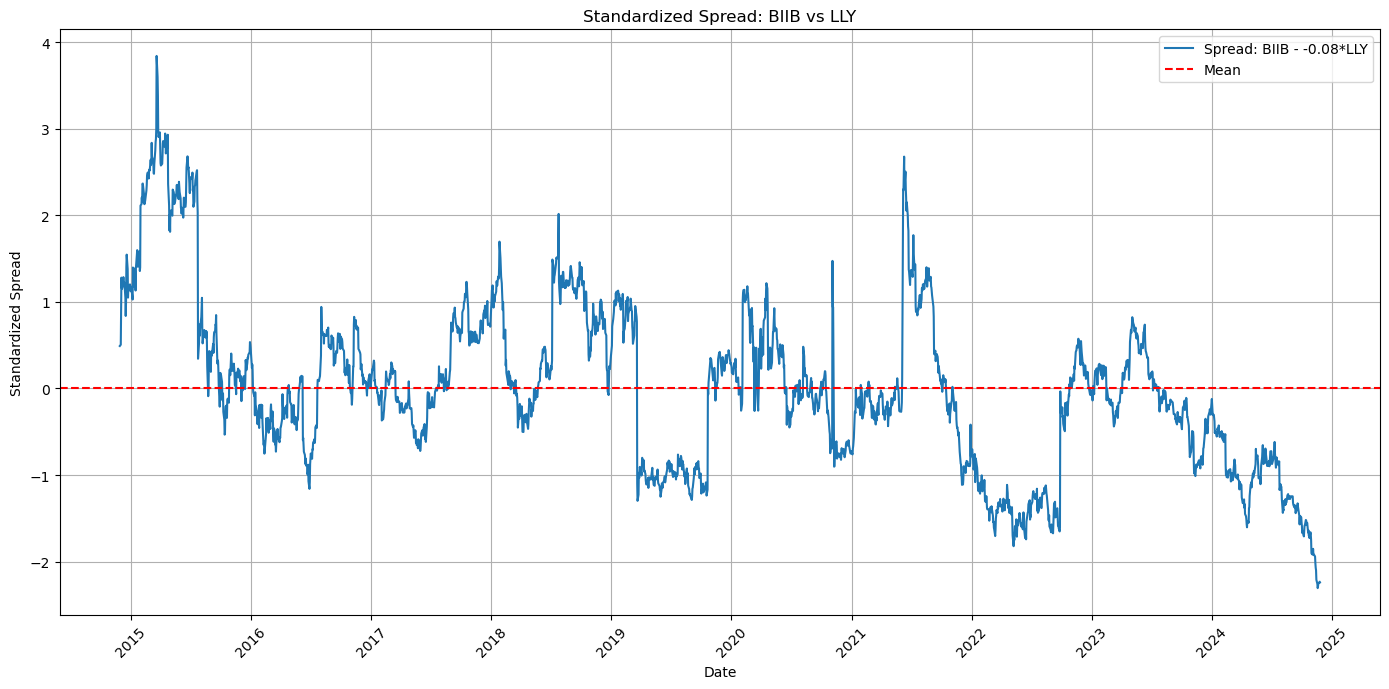


Total validated pairs found: 6
Validated Pairs: [('ABBV', 'CI'), ('ABT', 'ZTS'), ('AMGN', 'CI'), ('AMGN', 'SYK'), ('BIIB', 'BSX'), ('BIIB', 'LLY')]


In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Define a function for cointegration test
def find_cointegrated_pairs(sector_data, sector, p_value_threshold, t_stat_threshold):
    """
    Find cointegrated pairs in a given sector using both Engle-Granger and Johansen tests.
    """
    # Extract price data
    close_prices = sector_data[sector]['Adj Close']
    standardized_close = sector_data[sector]['Standardized Close']
    
    # List to store validated pairs
    validated_pairs_data = []
    
    # Perform tests on each unique pair
    tickers = close_prices.columns
    for i in range(len(tickers)):
        for j in range(i + 1, len(tickers)):
            stock_a = tickers[i]
            stock_b = tickers[j]
            
            # Get price series for the pair
            prices_a = close_prices[stock_a]
            prices_b = close_prices[stock_b]
            
            try:
                # Step 1: Engle-Granger Test
                t_statistic, p_value, _ = sm.tsa.coint(prices_a, prices_b)
                
                if p_value < p_value_threshold and t_statistic < t_stat_threshold:
                    print(f"\nPotential Pair Found: {stock_a}, {stock_b}")
                    print(f"Engle-Granger Test: p-value: {p_value:.4f}, t-statistic: {t_statistic:.4f}")
                    
                    # Step 2: Johansen Test
                    pair_prices = pd.concat([prices_a, prices_b], axis=1)
                    johansen_test = coint_johansen(pair_prices, det_order=1, k_ar_diff=1)
                    
                    # Check Johansen test at 5% significance
                    if johansen_test.lr1[0] > johansen_test.cvt[0, 1]:
                        print(f"Johansen Test Confirmed: Trace Statistic: {johansen_test.lr1[0]:.4f}")
                        
                        # Calculate hedge ratio from Johansen test
                        hedge_ratio = -johansen_test.evec[:, 0][1] / johansen_test.evec[:, 0][0]
                        print(f"Hedge Ratio: {hedge_ratio:.4f}")
                        
                        # Calculate standardized spread
                        spread_standardized = (standardized_close[stock_a] - 
                                            hedge_ratio * standardized_close[stock_b])
                        
                        # Store pair information
                        pair_data = {
                            'pair': (stock_a, stock_b),
                            'prices': pd.DataFrame({
                                'stock_A': prices_a,
                                'stock_B': prices_b
                            })
                        }
                        validated_pairs_data.append(pair_data)
                        
                        # Plot spread
                        plt.figure(figsize=(14, 7))
                        plt.plot(spread_standardized.index, spread_standardized, 
                               label=f"Spread: {stock_a} - {hedge_ratio:.2f}*{stock_b}")
                        plt.axhline(spread_standardized.mean(), color='red', 
                                  linestyle='--', label='Mean')
                        plt.title(f"Standardized Spread: {stock_a} vs {stock_b}")
                        plt.xlabel("Date")
                        plt.ylabel("Standardized Spread")
                        plt.legend()
                        plt.grid(True)
                        plt.xticks(rotation=45)
                        plt.tight_layout()
                        plt.show()
                        
            except Exception as e:
                print(f"Error processing pair {stock_a}-{stock_b}: {str(e)}")
                continue
    
    print(f"\nTotal validated pairs found: {len(validated_pairs_data)}")
    print("Validated Pairs:", [pair['pair'] for pair in validated_pairs_data])
    
    return validated_pairs_data

# Usage
sector = "Healthcare"
validated_pairs_data = find_cointegrated_pairs(
    sector_data= sector_data,
    sector='Healthcare',
    p_value_threshold=0.02,
    t_stat_threshold=-3.5
)

In [60]:
print(validated_pairs_data)

[{'pair': ('ABBV', 'CI'), 'prices':                stock_A     stock_B
Date                              
2014-11-28   45.751583   96.316383
2014-12-01   45.692085   96.007484
2014-12-02   45.797863   96.775101
2014-12-03   45.288773   97.383560
2014-12-04   45.996216   96.597229
...                ...         ...
2024-11-20  167.759995  323.390015
2024-11-21  171.729996  330.070007
2024-11-22  176.949997  328.450012
2024-11-25  177.059998  333.010010
2024-11-26  181.139999  335.000000

[2516 rows x 2 columns]}, {'pair': ('ABT', 'ZTS'), 'prices':                stock_A     stock_B
Date                              
2014-11-28   36.786427   41.785545
2014-12-01   36.629379   41.264740
2014-12-02   37.373219   41.608864
2014-12-03   37.753387   41.739048
2014-12-04   37.596367   40.920643
...                ...         ...
2024-11-20  115.930000  175.669998
2024-11-21  117.260002  176.710007
2024-11-22  117.760002  176.960007
2024-11-25  118.129997  178.710007
2024-11-26  117.959999  175

#### Now the cointegrated pairs are determined, we can start constructing the Deep Q-Networks(DQN) model

## 4.DQN Model Implementation
#### Improve the model by not explicitly defining boundaries. Rather, let the agent learn to execute strategies with optimized boundaries. Also, incorporate moving formation and trading windows into the training model.

In [61]:
# Step 1: Define the DQN Network for Trading Actions
import numpy as np
import pandas as pd
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),  # Increased size for more expressive power
            nn.ReLU(),
            nn.Linear(128, 128),  # Additional hidden layer
            nn.ReLU(),
            nn.Linear(128, 256),   # Additional hidden layer for deeper learning
            nn.ReLU(),
            nn.Linear(256, action_dim)  # Output layer for action values
        )

    def forward(self, state):
        return self.fc(state)
    


In [62]:
class PairsTradingEnv(gym.Env):
    def __init__(self, prices, formation_window_size, trading_window_size):
        super(PairsTradingEnv, self).__init__()
        
        self.prices_A = prices['stock_A'].values
        self.prices_B = prices['stock_B'].values
        self.dates = prices['dates']

        boundary_settings = [
            {'trade': 0.5, 'stop_loss': 3},
            {'trade': 1.5, 'stop_loss': 3.5},
            {'trade': 2, 'stop_loss': 4},
            {'trade': 2.5, 'stop_loss': 4.5},
            {'trade': 3, 'stop_loss': 5},
            {'trade': 3.5, 'stop_loss': 6},
            {'trade':float('inf'), 'stop_loss':float('inf')}
        ]
        self.boundary_settings = boundary_settings
        self.formation_window_size = formation_window_size
        self.trading_window_size = trading_window_size
        
        # Action space: select a boundary setting
        self.action_space = spaces.Discrete(len(self.boundary_settings))
        
        # Observation space: [hedge_ratio, spread_mean, spread_std]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)
        
        # Initialize variables
        self.current_step = 0
        self.total_steps = len(self.prices_A) - (formation_window_size + trading_window_size)
        if self.total_steps <= 0:
            raise ValueError("Not enough data for the specified formation and trading windows.")
        
        self.position = 0
        self.entry_price_A = None
        self.entry_price_B = None
        self.total_reward = 0  # Track total reward for the episode

        self.normal_close_count = 0
        self.stop_loss_count = 0
        self.exit_count = 0
        self.trades = []  # Initialize list to store trade details
        
    def reset(self):
        # Reset positions and rewards
        self.position = 0
        self.entry_price_A = None
        self.entry_price_B = None
        self.total_reward = 0

        self.normal_close_count = 0
        self.stop_loss_count = 0
        self.exit_count = 0

        # Reset current_step to 0 at the beginning of each episode
        self.current_step = 0
        
        # Extract formation and trading windows for the first step
        return self._get_state()
    
    def _get_state(self):
        # Ensure we have enough data left
        if self.current_step > self.total_steps:
            return None  # No more data
        
        # Set the start and end indices for the current window
        self.start_index = self.current_step
        self.end_index = self.start_index + self.formation_window_size + self.trading_window_size
        
        # Extract formation and trading windows
        self.formation_prices_A = self.prices_A[self.start_index:self.start_index + self.formation_window_size]
        self.formation_prices_B = self.prices_B[self.start_index:self.start_index + self.formation_window_size]
        self.trading_prices_A = self.prices_A[self.start_index + self.formation_window_size:self.end_index]
        self.trading_prices_B = self.prices_B[self.start_index + self.formation_window_size:self.end_index]
        
        # Calculate hedge ratio using OLS
        self.hedge_ratio = self.calculate_hedge_ratio(self.formation_prices_A, self.formation_prices_B)
        
        # Calculate spread
        self.formation_spread = self.formation_prices_A - self.hedge_ratio * self.formation_prices_B
        self.spread_mean = np.mean(self.formation_spread)
        self.spread_std = np.std(self.formation_spread)
        
        # State is based on formation window statistics
        state = np.array([self.hedge_ratio, self.spread_mean, self.spread_std], dtype=np.float32)
        return state
    
    def calculate_hedge_ratio(self, prices_A, prices_B):
        """Calculate hedge ratio using OLS regression"""
        X = np.array(prices_B).reshape(-1, 1)  # Convert Series to numpy array
        y = prices_A
        model = LinearRegression()
        model.fit(X, y)
        hedge_ratio = model.coef_[0]
        return hedge_ratio
    
    def step(self, action):
        # Set boundaries based on action
        boundaries = self.boundary_settings[action]
        trade_boundary = boundaries['trade']
        stop_loss_boundary = boundaries['stop_loss']
        
        # Simulate trading over the trading window
        reward = self.simulate_trading(trade_boundary, stop_loss_boundary)
        self.total_reward += reward
        
        # Move to the next window
        self.current_step += self.trading_window_size
        
        # Check if we have reached the end of the data
        done = self.current_step > self.total_steps
        if not done:
            next_state = self._get_state()
        else:
            next_state = None

        return next_state, reward, done,{}
    
    def simulate_trading(self, trade_boundary, stop_loss_boundary):
        total_reward = 0
        self.position = 0  # Ensure position is reset
        self.entry_price_A = None
        self.entry_price_B = None
        volume_A = 1  # Assume 1 unit for simplicity
        volume_B = abs(self.hedge_ratio)  # Hedge ratio determines the volume of B
        entry_time = None  # Initialize entry_time

        # Get the actual dates for this trading window
        trading_dates = self.dates[self.start_index + self.formation_window_size:self.end_index]
        for t in range(len(self.trading_prices_A)):
            price_A = self.trading_prices_A[t]
            price_B = self.trading_prices_B[t]
            current_date = trading_dates[t]
            spread_t = price_A - self.hedge_ratio * price_B
            zscore_t = (spread_t - self.spread_mean) / self.spread_std

            if self.position == 0:
                if zscore_t >= trade_boundary and zscore_t < stop_loss_boundary:
                    # Open short position
                    self.position = -1
                    self.entry_price_A = price_A
                    self.entry_price_B = price_B
                    entry_time = current_date  # Store actual date
                elif zscore_t <= -trade_boundary and zscore_t > -stop_loss_boundary:
                    # Open long position
                    self.position = 1
                    self.entry_price_A = price_A
                    self.entry_price_B = price_B
                    entry_time = current_date
            else:
                # Check for position closing conditions
                action = None
                if self.position == 1:
                    if zscore_t >= 0:
                        action = 'normal_close'
                        self.normal_close_count += 1
                    elif zscore_t <= -stop_loss_boundary:
                        action = 'stop_loss'
                        self.stop_loss_count += 1
                        
                elif self.position == -1:  # Short position
                    if zscore_t <= 0:
                        action = 'normal_close'
                        self.normal_close_count += 1
                    elif zscore_t >= stop_loss_boundary:
                        action = 'stop_loss'
                        self.stop_loss_count += 1


                if action:
                    reward = self.calculate_reward(
                        self.entry_price_A, self.entry_price_B,
                        price_A, price_B,
                        volume_A, volume_B,
                        self.position, action
                    )
                    total_reward += reward
                    # Record trade details
                    trade_details = {
                        'entry_date': entry_time,
                        'exit_date': current_date,
                        'position': self.position,
                        'entry_price_A': self.entry_price_A,
                        'entry_price_B': self.entry_price_B,
                        'exit_price_A': price_A,
                        'exit_price_B': price_B,
                        'volume_A': volume_A,
                        'volume_B': volume_B,
                        'action': action,
                        'profit': reward
                    }
                    self.trades.append(trade_details)

                    # Reset position and entry information
                    self.position = 0
                    self.entry_price_A = None
                    self.entry_price_B = None
                    entry_time = None  # Reset entry_time

        # At the end of the trading window, close any open positions
        if self.position != 0:
            action = 'exit'
            self.exit_count += 1
            price_A = self.trading_prices_A[-1]
            price_B = self.trading_prices_B[-1]
            reward = self.calculate_reward(
                self.entry_price_A, self.entry_price_B,
                price_A, price_B,
                volume_A, volume_B,
                self.position, action
            )
            total_reward += reward


            # Record trade details
            current_date = trading_dates[-1]  # Use last date in window
            trade_details = {
                'entry_date': entry_time,
                'exit_date': current_date,
                'position': self.position,
                'entry_price_A': self.entry_price_A,
                'entry_price_B': self.entry_price_B,
                'exit_price_A': self.trading_prices_A[-1],
                'exit_price_B': self.trading_prices_B[-1],
                'volume_A': volume_A,
                'volume_B': volume_B,
                'action': 'exit',
                'profit': reward
            }
            self.trades.append(trade_details)

            # Reset position and entry information
            self.position = 0
            self.entry_price_A = None
            self.entry_price_B = None
            entry_time = None  # Reset entry_time
            
        return total_reward
    
    def calculate_reward(self, entry_price_A, entry_price_B, current_price_A, current_price_B, volume_A, volume_B, position, action):
        # Ensure entry prices are not None when calculating reward
        assert entry_price_A is not None and entry_price_B is not None, "Entry prices should not be None when calculating reward."
        reward= 0
        # Reward calculation based on position and exit condition
        if position == 1:  # Long position
            W_t = (
                volume_A * ((current_price_A - entry_price_A) / entry_price_A) +
                volume_B * ((entry_price_B - current_price_B) / entry_price_B)
            )
        elif position == -1:  # Short position
            W_t = (
                volume_A * ((entry_price_A - current_price_A) / entry_price_A) +
                volume_B * ((current_price_B - entry_price_B) / entry_price_B)
            )
        else:
            W_t = 0

        if action == 'normal_close':
            reward= 1000 * abs(W_t)  # Adjusted multiplier for normal close
        elif action == 'stop_loss':
            reward = -1000* abs(W_t)  # Adjusted penalty for stop-loss
        elif action == 'exit':
            reward = -500 * abs(W_t)  # Adjusted penalty for forced exit
        else:
            reward = 0
        return reward

In [63]:
def get_hyperparameters():
    hyperparameters = {
        'gamma': 0.99,
        'epsilon_start': 1,
        'epsilon_end': 0.01,
        'epsilon_decay': 0.95,
        'learning_rate': 0.01,
        'batch_size': 128,
        'target_update_freq': 100,
        'num_episodes': 200,  # Set the desired number of training episodes
    }
    return hyperparameters

In [64]:
def train_agent(training_prices,formation_window_size, trading_window_size):
    # Get hyperparameters
    hyperparams = get_hyperparameters()
    gamma = hyperparams['gamma']
    epsilon = hyperparams['epsilon_start']
    epsilon_min = hyperparams['epsilon_end']
    epsilon_decay = hyperparams['epsilon_decay']
    learning_rate = hyperparams['learning_rate']
    batch_size = hyperparams['batch_size']
    target_update_freq = hyperparams['target_update_freq']
    num_episodes = hyperparams['num_episodes']
    
    # Initialize agent and optimizer
    state_dim = 3  # [hedge_ratio, spread_mean, spread_std]
    action_dim = 7  # Number of boundary settings
    
    agent = DQN(state_dim, action_dim)
    target_agent = DQN(state_dim, action_dim)
    target_agent.load_state_dict(agent.state_dict())
    optimizer = optim.Adam(agent.parameters(), lr=learning_rate)
    
    replay_buffer = deque(maxlen=10000)
    total_rewards = []
    avg_q_values_per_episode = []  # To store average Q-values per episode
    step_count = 0
    # Initialize lists to store counts
    normal_close_counts = []
    stop_loss_counts = []
    exit_counts = []
    for episode in range(num_episodes):
        # Create environment for each episode
        env = PairsTradingEnv(
            prices = training_prices,
            formation_window_size=formation_window_size,
            trading_window_size=trading_window_size
        )
        
        state = env.reset()
        done = False
        episode_q_values = []  # To store Q-values in this episode
        
        while not done:
            # Compute Q-values for the current state
            state = np.array(state, dtype=np.float32)
            with torch.no_grad():
                state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
                q_values = agent(state_tensor)
                # Compute mean Q-value and collect it
                mean_q_value = q_values.mean().item()
                episode_q_values.append(mean_q_value)
            
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = torch.argmax(q_values).item()
            
            # Execute trading strategy and obtain reward
            next_state, reward, done, info = env.step(action)
            
            # Store transition in replay buffer
            replay_buffer.append((state, action, reward, next_state, done))
            
            # Training
            if len(replay_buffer) >= batch_size:
                minibatch = random.sample(replay_buffer, batch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)
                
                states = torch.tensor(states, dtype=torch.float32)
                actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
                rewards = torch.tensor(rewards, dtype=torch.float32)
                dones = torch.tensor(dones, dtype=torch.float32)
                
                # Compute targets
                q_values_pred = agent(states).gather(1, actions)
                with torch.no_grad():
                    next_q_values = torch.zeros(batch_size)
                    for idx, next_state in enumerate(next_states):
                        if next_state is not None:
                            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
                            next_q_values[idx] = target_agent(next_state_tensor).max(1)[0]
                target_q_values = rewards + (1 - dones) * gamma * next_q_values
                
                # Update agent
                loss = nn.functional.mse_loss(q_values_pred.squeeze(), target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                # Update target network
                if step_count % target_update_freq == 0:
                    target_agent.load_state_dict(agent.state_dict())
                step_count += 1
            
            # Move to next state
            state = next_state if next_state is not None else state
        
        # At the end of the episode, compute average Q-value
        avg_q_value = np.mean(episode_q_values)
        avg_q_values_per_episode.append(avg_q_value)
        
        # Collect total rewards
        total_rewards.append(env.total_reward)
        normal_close_counts.append(env.normal_close_count)
        stop_loss_counts.append(env.stop_loss_count)
        exit_counts.append(env.exit_count)
        # Epsilon decay
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        
        # Optional: Print progress
        if episode % 10 == 0:
            print(f'Episode {episode}, Total Reward: {env.total_reward:.2f}, Epsilon: {epsilon:.4f}, Avg Q-value: {avg_q_value:.4f}')
    
    # Plot total rewards
    plt.figure()
    plt.plot(total_rewards, label='Total Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    
    # Fit a linear regression model to the total rewards
    X = np.arange(len(total_rewards)).reshape(-1, 1)
    y = np.array(total_rewards).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot the linear regression line
    plt.plot(X, y_pred, color='red', linestyle='--', label='Linear Regression')
    plt.legend()
    plt.show()

    counts = {
        'normal_close': [nc / (nc + sl + ex) for nc, sl, ex in zip(normal_close_counts, stop_loss_counts, exit_counts)],
        'stop_loss': [sl / (nc + sl + ex) for nc, sl, ex in zip(normal_close_counts, stop_loss_counts, exit_counts)],
        'exit': [ex / (nc + sl + ex) for nc, sl, ex in zip(normal_close_counts, stop_loss_counts, exit_counts)]
    }
    # Plot counts per episode
    plt.figure(figsize=(10, 6))
    plt.plot(counts['normal_close'], label='Normal Close')
    plt.plot(counts['stop_loss'], label='Stop Loss')
    plt.plot(counts['exit'], label='Exit')
    plt.xlabel('Episode')
    plt.ylabel('Ratio of Occurrence')
    plt.title('Ratio of Portfolio Closures per Episode')
    plt.legend()
    plt.show()

    # Plot average Q-values per episode
    plt.figure()
    plt.plot(avg_q_values_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Average Q-value')
    plt.title('Average Q-value per Episode')
    plt.show()

    # Save the trained agent
    torch.save(agent.state_dict(), 'trained_agent.pth')
    return agent


In [65]:
# Train the agent using the training data
def stock_Data(pair_data):
    """
    Process pair data and split into training and test sets while preserving dates
    
    Args:
        pair_data: Dictionary containing pair information and price data
        
    Returns:
        List containing training and test price dictionaries with dates
    """
    print("Selected Pair:", pair_data['pair'])
    
    # Get the price DataFrame which now has dates as index
    prices_df = pair_data['prices']
    
    # Split the data into training (50%) and test (50%) sets
    split_index = len(prices_df) // 2
    
    # Create training and test sets with dates preserved
    train_prices = {
        'stock_A': prices_df['stock_A'].iloc[:split_index],
        'stock_B': prices_df['stock_B'].iloc[:split_index],
        'dates': prices_df.index[:split_index]
    }
    
    test_prices = {
        'stock_A': prices_df['stock_A'].iloc[split_index:],
        'stock_B': prices_df['stock_B'].iloc[split_index:],
        'dates': prices_df.index[split_index:]
    }
    
    return [train_prices, test_prices]

Selected Pair: ('ABT', 'ZTS')
Episode 0, Total Reward: -465.88, Epsilon: 0.9500, Avg Q-value: 0.2796
Episode 10, Total Reward: -473.02, Epsilon: 0.5688, Avg Q-value: 47.2063
Episode 20, Total Reward: -248.35, Epsilon: 0.3406, Avg Q-value: 88.2922
Episode 30, Total Reward: -156.02, Epsilon: 0.2039, Avg Q-value: 103.4349
Episode 40, Total Reward: 168.08, Epsilon: 0.1221, Avg Q-value: 109.5191
Episode 50, Total Reward: -155.64, Epsilon: 0.0731, Avg Q-value: 112.4705
Episode 60, Total Reward: -76.40, Epsilon: 0.0438, Avg Q-value: 105.7414
Episode 70, Total Reward: -153.73, Epsilon: 0.0262, Avg Q-value: 109.8676
Episode 80, Total Reward: 177.58, Epsilon: 0.0157, Avg Q-value: 109.1651
Episode 90, Total Reward: 289.76, Epsilon: 0.0100, Avg Q-value: 104.5905
Episode 100, Total Reward: 114.48, Epsilon: 0.0100, Avg Q-value: 104.8558
Episode 110, Total Reward: 94.42, Epsilon: 0.0100, Avg Q-value: 98.5588
Episode 120, Total Reward: -30.36, Epsilon: 0.0100, Avg Q-value: 99.1686
Episode 130, Total R

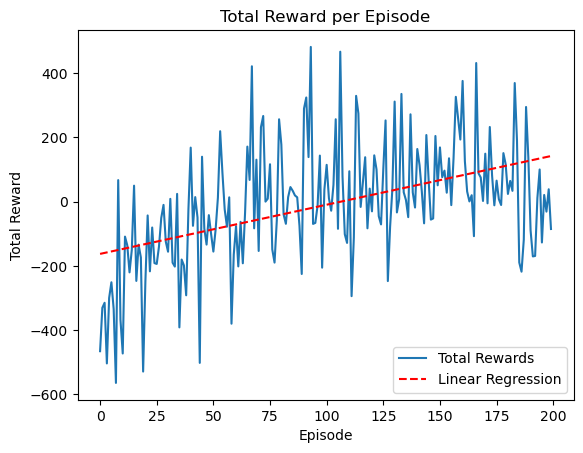

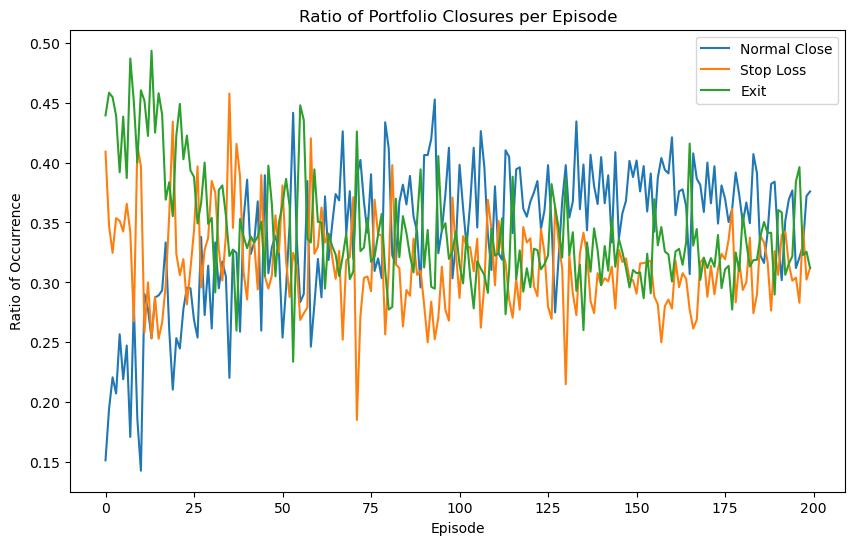

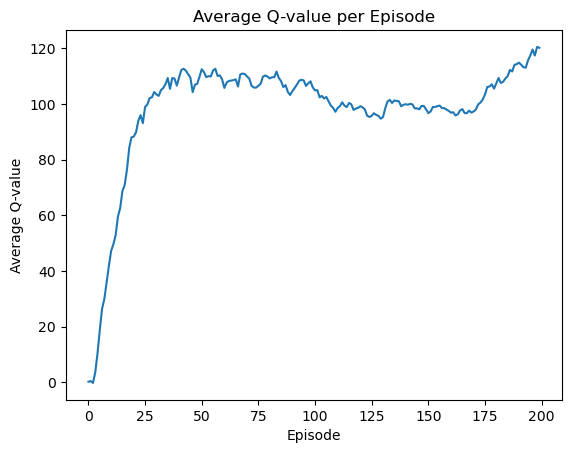

In [107]:
# define the formation window and trading window
agent = train_agent(
    training_prices=stock_Data(validated_pairs_data[1])[0],
    formation_window_size=30,
    trading_window_size= 15
)  


## 5.Evaluation

#### Implement the model on testing set. Using multiple evaluative metrics including total profits, maximum drawdown and sharpe ratio

In [67]:
def calculate_trade_profit(trade): # Define the function to calculate total profits
    position = trade['position']
    volume_A = trade['volume_A']
    volume_B = trade['volume_B']
    entry_price_A = trade['entry_price_A']
    entry_price_B = trade['entry_price_B']
    exit_price_A = trade['exit_price_A']
    exit_price_B = trade['exit_price_B']
    
    if position == 1:  # Long position
        profit = (
            volume_A * (exit_price_A - entry_price_A)/entry_price_A +
            volume_B * (entry_price_B - exit_price_B)/entry_price_B
        )
    elif position == -1:  # Short position
        profit = (
            volume_A * (entry_price_A - exit_price_A)/entry_price_A +
            volume_B * (exit_price_B - entry_price_B)/entry_price_B
        )
    else:
        profit = 0
    return profit

In [68]:
def calculate_max_drawdown(cumulative_returns): # Design a function to calculate maximum drawdown
    """Calculate the maximum drawdown according to MDD(T) formula.
    
    Args:
        cumulative_returns: numpy array of cumulative account balance/returns
    
    Returns:
        Maximum drawdown as a percentage of the peak balance
    """
    acc_balance = cumulative_returns  # This is our AccBalance(t)
    rolling_max = np.maximum.accumulate(acc_balance)  # Peak values up to time t
    
    # Calculate drawdown percentage at each time t
    # Note: using np.finfo(float).eps to avoid division by zero
    drawdown = (acc_balance-rolling_max) / rolling_max
    
    # Get the maximum drawdown
    max_drawdown = np.min(drawdown)
    
    return max_drawdown

In [69]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    """Calculate the Sharpe ratio for a series of returns.
    
    Args:
        returns: numpy array of daily returns
        risk_free_rate: annual risk-free rate (default 2%)
    
    Returns:
        Sharpe ratio of the returns
    """
    # Convert daily returns to excess returns
    excess_returns = returns - (risk_free_rate / 252)  # Assuming 252 trading days per year
    
    # Calculate annualized Sharpe ratio
    sharpe_ratio = np.sqrt(252) * (np.mean(excess_returns) / np.std(excess_returns))
    
    return sharpe_ratio

In [92]:
def evaluate_agent(agent, test_prices, formation_window_size, trading_window_size):
    env = PairsTradingEnv(
        prices=test_prices,
        formation_window_size=formation_window_size,
        trading_window_size=trading_window_size
    )

    state = env.reset()
    done = False
    
    # Get full date range for testing period
    dates = test_prices['dates']
    
    while not done:
        state = np.array(state, dtype=np.float32)
        with torch.no_grad():
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            q_values = agent(state_tensor)
            action = torch.argmax(q_values).item()
        
        next_state, _, done, _ = env.step(action)
        state = next_state if next_state is not None else state
    
    trades = env.trades
    
    # Create a DataFrame with all dates and their corresponding balances
    daily_balance = pd.DataFrame(index=dates)
    daily_balance['balance'] = 1  # Initialize all days with starting balance
    current_balance = 1
    
    # Update balance on trade dates
    for trade in trades:
        trade_date = trade['exit_date']
        profit = calculate_trade_profit(trade)
        current_balance += profit
        daily_balance.loc[trade_date:, 'balance'] = current_balance
    
    # Plot with actual dates
    plt.figure(figsize=(10, 6))
    plt.plot(daily_balance.index, daily_balance['balance'], 
            color='red', linewidth=1.5, label='PTDQN',
            alpha=0.8)
    
    # Add light shading around the line
    window = 20  # for rolling mean
    rolling_std = daily_balance['balance'].rolling(window=window).std()
    rolling_mean = daily_balance['balance'].rolling(window=window).mean()
    plt.fill_between(daily_balance.index, 
                    rolling_mean - rolling_std, 
                    rolling_mean + rolling_std,
                    color='red', alpha=0.2)
    
    # Customize the plot
    plt.title('Portfolio Value Over Time', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Profit', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Format axes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Format date axis
    plt.gcf().autofmt_xdate()
    years = mdates.YearLocator(1)
    years_fmt = mdates.DateFormatter('%Y')
    plt.gca().xaxis.set_major_locator(years)
    plt.gca().xaxis.set_major_formatter(years_fmt)
    
    plt.tight_layout()
    # Calculate final metrics
    final_balance = daily_balance['balance'].iloc[-1]
    max_drawdown = calculate_max_drawdown(daily_balance['balance'].values)

    daily_returns = daily_balance['balance'].pct_change().dropna()
    sharpe_ratio = calculate_sharpe_ratio(daily_returns)  # Using daily returns series
    
    return final_balance, max_drawdown, sharpe_ratio

Selected Pair: ('ABT', 'ZTS')
total profit: 1.7908538616066412
max drawdown: -0.1447547844122051
sharpe ratio: 0.8514825783118725


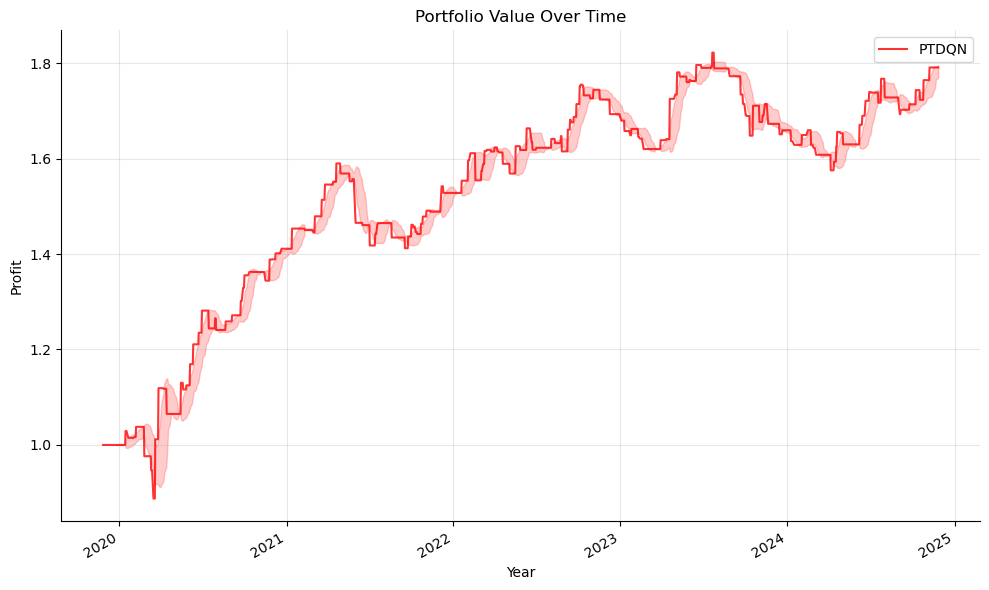

In [108]:
def load_trained_agent(state_dim, action_dim, model_path):
    # Initialize the model architecture
    agent = DQN(state_dim, action_dim)
    
    # Load the saved state dictionary
    agent.load_state_dict(torch.load(model_path, weights_only=True))
    

    return agent

# Main execution
if __name__ == '__main__':
    # Parameters (ensure these match your model's parameters)
    formation_window_size = 30
    trading_window_size = 15
    
    # Load the trained agent
    agent = load_trained_agent(state_dim=3, action_dim=7, model_path='trained_agent.pth')
    # Set the model to evaluation mode
    agent.eval()
    # Get test data
    test_prices = stock_Data(validated_pairs_data[1])[1]
    # Evaluate the agent
    evaluation_results = evaluate_agent(
        agent,
        test_prices,
        formation_window_size,
        trading_window_size
    )
    print('total profit:', evaluation_results[0])
    print('max drawdown:', evaluation_results[1])
    print('sharpe ratio:', evaluation_results[2])

Selected Pair: ('ABT', 'ZTS')
Simple Strategy Results:
Total profit: 1.2249535504502773
Max drawdown: -0.11019221984830513
Sharpe ratio: 0.3633417656055854


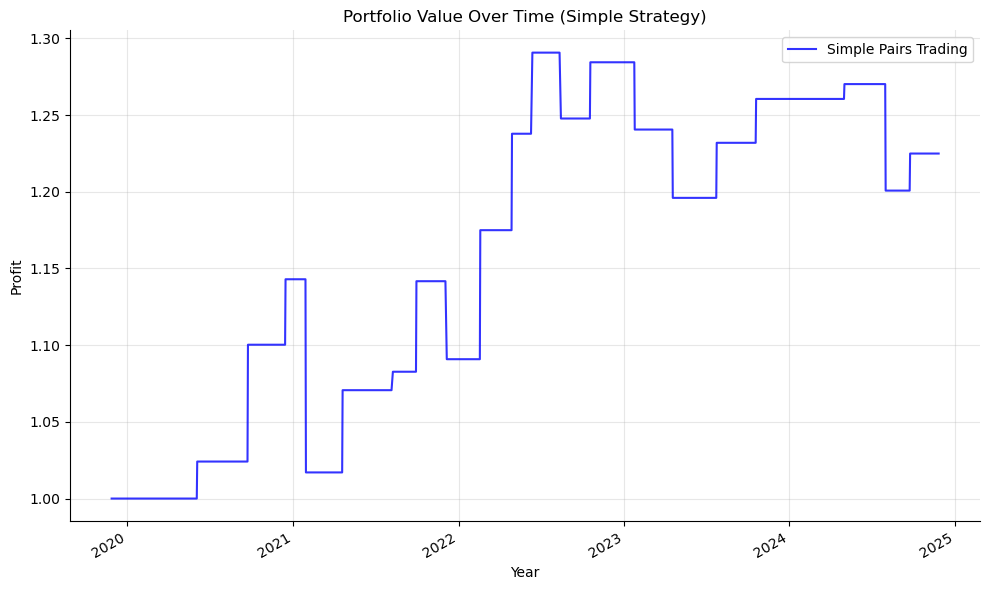

In [100]:
def traditional_pairs_trading(prices, trading_boundaries=2, stop_loss=5):
    """
    Basic pairs trading strategy with fixed boundaries for comparison
    
    Args:
        prices_df: DataFrame containing price data for both stocks
        trading_boundaries: Number of std deviations for entry (default 1.5)
        stop_loss: Number of std deviations for stop loss (default 2.5)
    
    Returns:
        final_balance, max_drawdown, sharpe_ratio
    """
    # Extract prices for both stocks
    stock_A = prices['stock_A']
    stock_B = prices['stock_B']
    dates = prices['dates']
    
    # Calculate spread and hedge ratio
    hedge_ratio = np.polyfit(stock_B, stock_A, 1)[0]
    spread = stock_A - hedge_ratio * stock_B
    
    # Calculate rolling statistics
    lookback = 75
    spread_mean = spread.rolling(window=lookback).mean()
    spread_std = spread.rolling(window=lookback).std()
    z_score = (spread - spread_mean) / spread_std
    
    # Initialize tracking variables
    position = 0  # 0: no position, 1: long spread, -1: short spread
    daily_balance = pd.DataFrame(index=dates)
    daily_balance['balance'] = 1.0
    current_balance = 1.0
    volume_A = 1.0  # Fixed volume for stock A
    volume_B = hedge_ratio  # Volume for stock B based on hedge ratio
    
    # Trading loop
    for i in range(lookback, len(dates)):
        current_zscore = z_score[i]
        
        # Trading logic similar to DQN but with fixed boundaries
        if position == 0:  # No position
            if current_zscore > trading_boundaries and current_zscore < stop_loss:
                # Short spread: Short A, Long B
                position = -1
                entry_price_A = stock_A[i]
                entry_price_B = stock_B[i]
            elif current_zscore < -trading_boundaries and current_zscore > -stop_loss:
                # Long spread: Long A, Short B
                position = 1
                entry_price_A = stock_A[i]
                entry_price_B = stock_B[i]
                
        elif position == 1:  # Long spread position
            if current_zscore > 0 or current_zscore > stop_loss:
                # Close position
                exit_price_A = stock_A[i]
                exit_price_B = stock_B[i]
                # Calculate profit using volumes and actual prices
                profit = volume_A * (entry_price_A - exit_price_A) / entry_price_A+ volume_B * (exit_price_B - entry_price_B) / entry_price_B
                current_balance +=  profit
                position = 0
                
                
        elif position == -1:  # Short spread position
            if current_zscore < 0 or current_zscore > stop_loss:
                # Close position
                exit_price_A = stock_A[i]
                exit_price_B = stock_B[i]
                # Calculate profit using volumes and actual prices
                profit = volume_A * (entry_price_A - exit_price_A) / entry_price_A+ volume_B * (exit_price_B - entry_price_B) / entry_price_B
                current_balance +=  profit
                position = 0
        
        daily_balance.loc[dates[i], 'balance'] = current_balance
    
    # Fill forward any missing values
    daily_balance['balance'] = daily_balance['balance'].fillna(method='ffill')
    
    # Calculate daily returns
    daily_returns = daily_balance['balance'].pct_change().dropna()
    
    # Calculate metrics
    final_balance = daily_balance['balance'].iloc[-1]
    max_drawdown = calculate_max_drawdown(daily_balance['balance'].values)
    sharpe_ratio = calculate_sharpe_ratio(daily_returns)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(daily_balance.index, daily_balance['balance'], 
            color='blue', linewidth=1.5, label='Simple Pairs Trading',
            alpha=0.8)
    

    plt.title('Portfolio Value Over Time (Simple Strategy)', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Profit', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    
    return final_balance, max_drawdown, sharpe_ratio

test_prices = stock_Data(validated_pairs_data[1])[1]
results = traditional_pairs_trading(test_prices)
print('Simple Strategy Results:')
print('Total profit:', results[0])
print('Max drawdown:', results[1])
print('Sharpe ratio:', results[2])